<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/mini_proyectos/chedraui_accion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

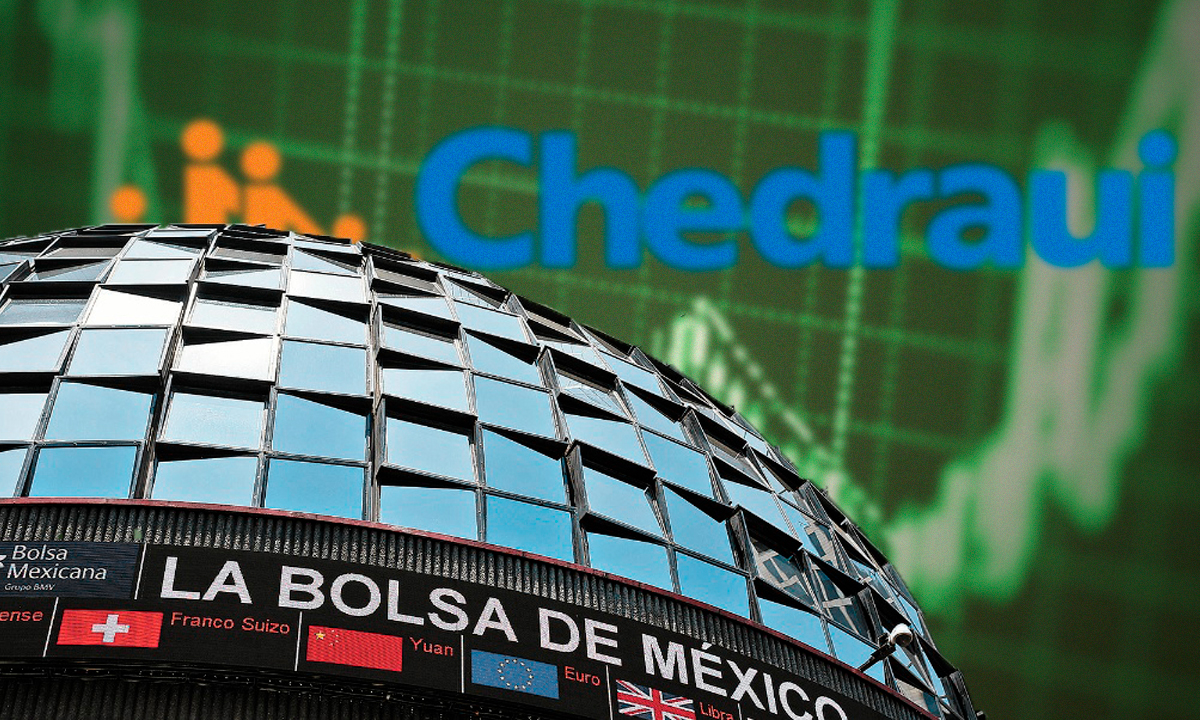

# <b> Analisis de la acción de Chedraui usando técnicas de probabilidad y estadística, con un enfoque en series temporales y modelos predictivos

## <b>Instalación de librerias

In [ ]:
!pip install yfinance

In [ ]:
# Codigo para hacer pruebas de inversiones, gestion de cartera y pronosticos usando ML & IA

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Define el símbolo de la acción en la Bolsa Mexicana de Valores
symbol = "CHDRAUIB.MX"

# Obtén los datos históricos de Chedraui
chedraui_data = yf.download(symbol, start="2015-01-01", end="2024-12-26", interval="1d")

# Revisa los primeros registros del dataset
print(chedraui_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker     CHDRAUIB.MX CHDRAUIB.MX CHDRAUIB.MX CHDRAUIB.MX CHDRAUIB.MX   
Date                                                                     
2015-01-02   37.036526   41.180000   42.799999   40.259998   42.500000   
2015-01-05   36.146137   40.189999   41.180000   39.520000   41.180000   
2015-01-06   36.640808   40.740002   41.330002   39.990002   39.990002   
2015-01-07   36.694759   40.799999   41.200001   40.500000   40.939999   
2015-01-08   37.423264   41.610001   42.840000   40.599998   40.599998   

Price           Volume  
Ticker     CHDRAUIB.MX  
Date                    
2015-01-02      158849  
2015-01-05      271763  
2015-01-06      196816  
2015-01-07      579985  
2015-01-08      384695  


In [ ]:
# convertir chedraui en un df
chedraui_df = pd.DataFrame(chedraui_data)
chedraui_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,CHDRAUIB.MX,CHDRAUIB.MX,CHDRAUIB.MX,CHDRAUIB.MX,CHDRAUIB.MX,CHDRAUIB.MX
Date,,,,,,
2015-01-02,37.036526,41.180000,42.799999,40.259998,42.500000,158849
2015-01-05,36.146137,40.189999,41.180000,39.520000,41.180000,271763
2015-01-06,36.640808,40.740002,41.330002,39.990002,39.990002,196816
2015-01-07,36.694759,40.799999,41.200001,40.500000,40.939999,579985
2015-01-08,37.423264,41.610001,42.840000,40.599998,40.599998,384695


# Visualización de la Serie Temporal
- <b> Gráficos de Línea: Traza las columnas Close y Adj Close para observar la tendencia de precios a lo largo del tiempo.

- Volatilidad: Traza el volumen (Volume) en el tiempo. Un alto volumen en ciertos momentos podría indicar un cambio de tendencia o volatilidad significativa. </b>

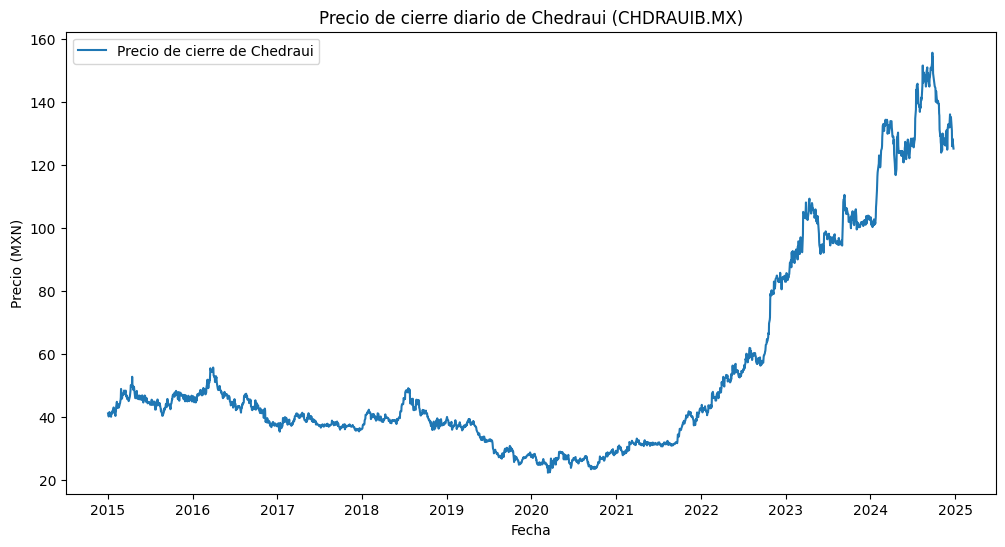

In [ ]:
# Gráfico del precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(chedraui_data['Close'], label="Precio de cierre de Chedraui")
plt.title("Precio de cierre diario de Chedraui (CHDRAUIB.MX)")
plt.xlabel("Fecha")
plt.ylabel("Precio (MXN)")
plt.legend()
plt.show()


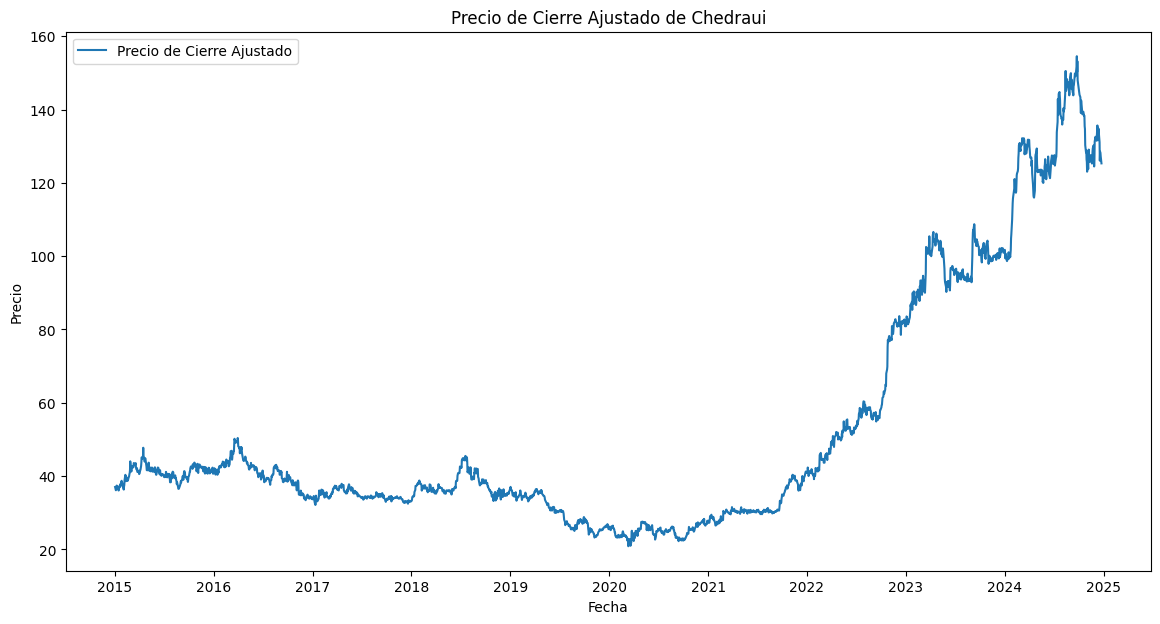

In [ ]:
# Visualizar el precio de cierre ajustado
plt.figure(figsize=(14, 7))
plt.plot(chedraui_data['Adj Close'], label='Precio de Cierre Ajustado')
plt.title('Precio de Cierre Ajustado de Chedraui')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Componentes de la serie temporal

### <b> OBJETIVO: </b>
- Estrategia para identificar componentes que puedan revelar patrones ocultos.
- Al descomponer la serie, podemos analizar por separado los elementos que componen el precio.

### Ventajas de Descomponer la Serie de Precios de Cierre Ajustado

<b>Tendencia: </b> La componente de tendencia muestra la dirección general del precio a lo largo del tiempo. Esto es clave para evaluar si la acción tiene una tendencia alcista o bajista a largo plazo.

<b> Estacionalidad: </b> Aunque los precios de acciones suelen ser menos estacionales que otras series temporales, a veces puede haber patrones repetitivos en ciertos períodos (e.g., trimestres o meses) debido a reportes financieros o patrones de inversión estacionales.

<b> Componente Residual: </b> El componente residual (o "ruido") captura la variabilidad que no está explicada por la tendencia o la estacionalidad. Este es un buen indicador de eventos impredecibles y volatilidad que podrían requerir modelos avanzados para capturar.

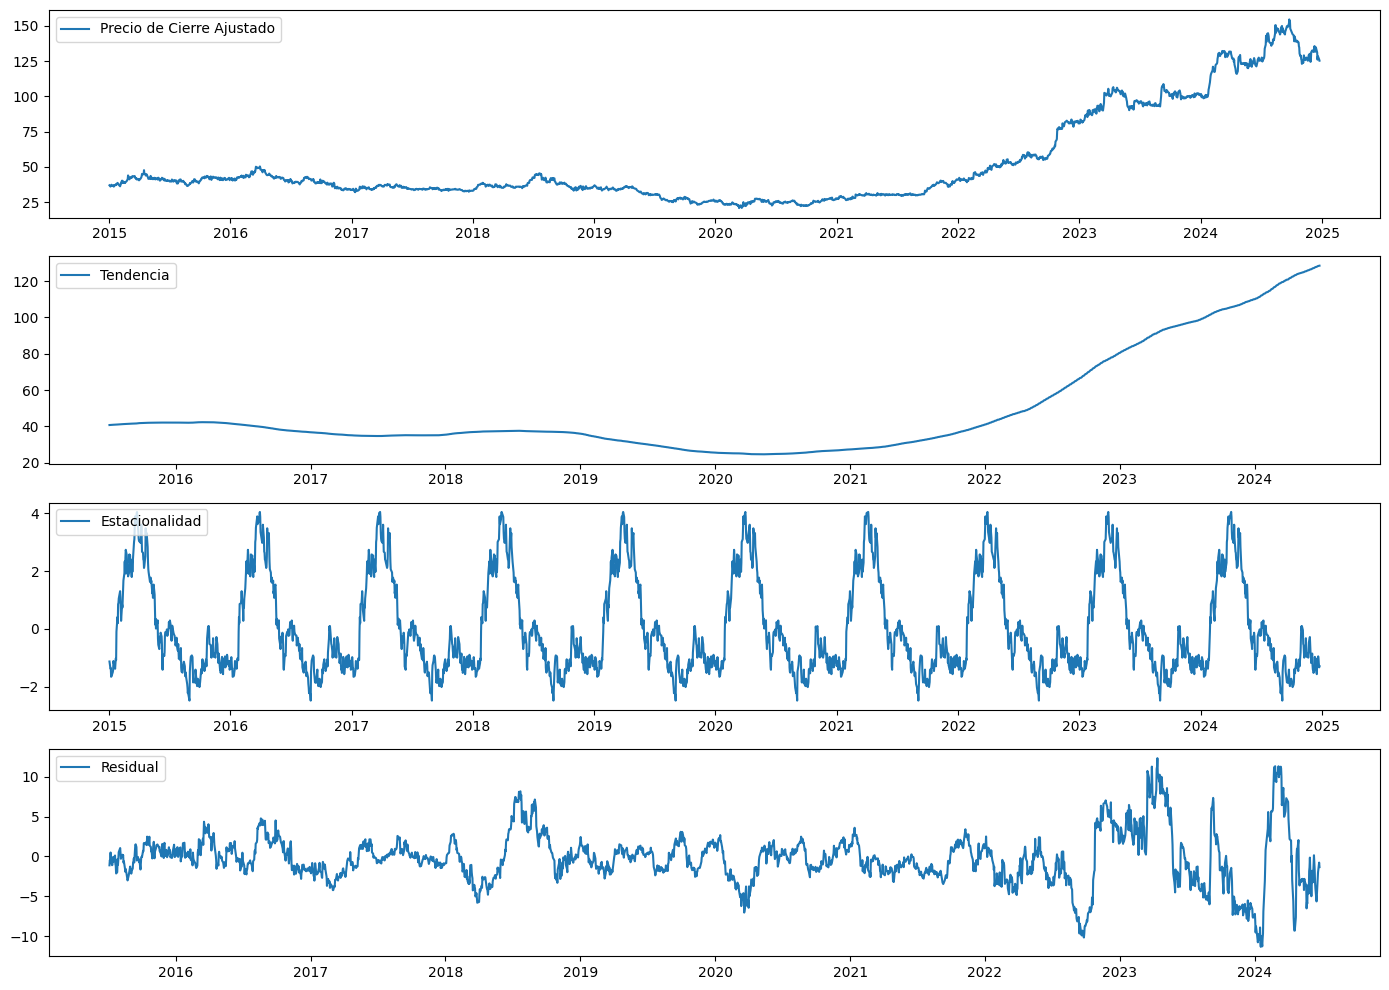

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegurarse de que no hay valores faltantes en la serie
chedraui_data['Adj Close'].dropna(inplace=True)

# Descomposición aditiva de la serie temporal
decomposition = seasonal_decompose(chedraui_data['Adj Close'], model='additive', period=252)  # 252 días por año para datos diarios

# Gráficos de los componentes
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(chedraui_data['Adj Close'], label='Precio de Cierre Ajustado')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# USANDO ACF

In [ ]:
import pandas as pd

# Asegúrate de que el índice es de tipo datetime
chedraui_data.index = pd.to_datetime(chedraui_data.index)

# Resamplea los datos para obtener el último precio ajustado de cada trimestre
quarterly_data = chedraui_data['Adj Close'].resample('Q').last()

# Calcula la variación porcentual trimestral
quarterly_returns = quarterly_data.pct_change() * 100  # Multiplica por 100 para obtener el porcentaje

# Muestra las ganancias trimestrales
quarterly_returns = quarterly_returns.dropna()  # Elimina NaN del primer trimestre
print(quarterly_returns)


Ticker      CHDRAUIB.MX
Date                   
2015-06-30    -2.805085
2015-09-30    -1.299585
2015-12-31     4.290584
2016-03-31    19.677847
2016-06-30   -16.453162
2016-09-30    -7.285055
2016-12-31   -12.411516
2017-03-31     8.620692
2017-06-30    -7.115397
2017-09-30    -2.100182
2017-12-31    -0.770066
2018-03-31     6.790464
2018-06-30    20.802239
2018-09-30    -9.223099
2018-12-31    -5.809218
2019-03-31    -4.467008
2019-06-30   -12.969905
2019-09-30    -4.811829
2019-12-31   -11.438759
2020-03-31    -8.196119
2020-06-30     9.297981
2020-09-30   -10.270663
2020-12-31    18.842969
2021-03-31    12.204455
2021-06-30     0.355672
2021-09-30    11.062360
2021-12-31    19.695256
2022-03-31    20.603492
2022-06-30     7.443306
2022-09-30     9.628824
2022-12-31    39.155197
2023-03-31    24.066499
2023-06-30    -4.472457
2023-09-30     4.592989
2023-12-31     0.735152
2024-03-31    30.436889
2024-06-30    -4.529826
2024-09-30    16.318325
2024-12-31   -14.359963


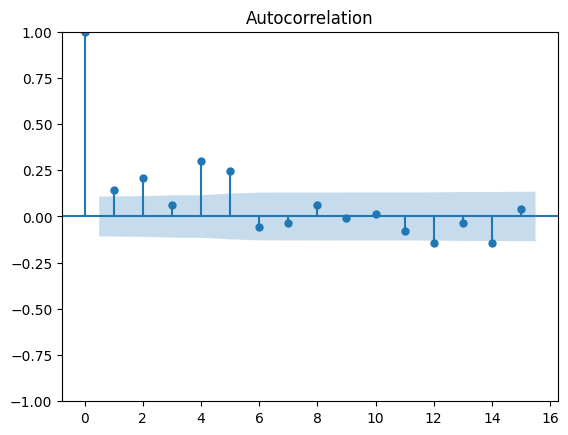

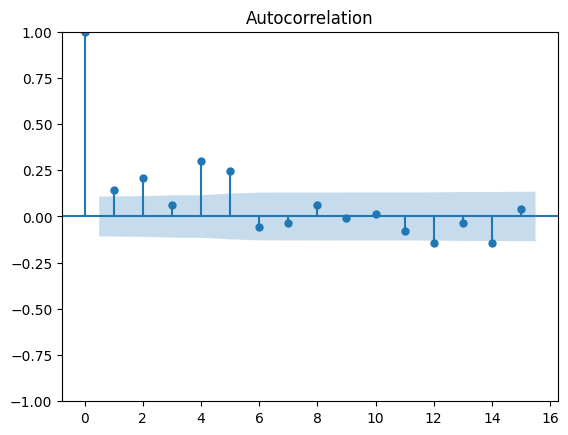

In [ ]:
import statsmodels.api as sm

# Calcula las ganancias trimestrales (como se hizo antes)
quarterly_returns = chedraui_data['Adj Close'].resample('Q').last().pct_change() * 100
quarterly_returns = quarterly_returns.dropna()  # Elimina NaN

# Calcula y grafica la función de autocorrelación de las ganancias trimestrales
sm.graphics.tsa.plot_acf(quarterly_returns, lags=15, alpha = 0.5)


- La gráfica sugiere que las ganancias trimestrales de la acción de Chedraui pueden tener una ligera dependencia en trimestres anteriores, pero esta dependencia parece disminuir rápidamente. Esto podría implicar que, aunque existen algunos patrones a corto plazo, las ganancias trimestrales son relativamente independientes entre sí en períodos más largos

# Preprocesamiento de datos:
- <b> Calcular retornos: </b> Convertir los precios en retornos logaritmicos diarios y mensuales
- <b> Dividir en Conjuntos de Entrenamiento y Prueba: 80%, 20% </b>

In [ ]:
import numpy as np

# Calcular retornos logaritmicos diarios
retornos = chedraui_data['log_returns'] = np.log(chedraui_data['Adj Close'] / chedraui_data['Adj Close'].shift(1)).dropna()
# calcular retornos logaritmicos mensuales
chedraui_data['log_returns_monthly'] = chedraui_data['log_returns'].resample('M').sum()


# Modelos de Series Temporales (ARIMA, Prophet)
1. <b> ARIMA para Pronóstico de Retornos. </b>

 Utilizaría un modelo ARIMA para pronosticar el retorno de la acción en el corto plazo. Este tipo de modelo es útil cuando los datos muestran autocorrelación en retardos recientes, como mostro la ACF

## A tomar en cuenta:
1. <b>Diferenciación: </b> Si los retornos muestran una tendencia, realizaría diferenciación para hacer la serie estacionaria.
2. <b> Selección de Parámetros: </b> Usaría el AIC y BIC para seleccionar los mejores parámetros (p, d, q) para el modelo ARIMA.
3.  <b>Evaluación: </b> Comprobaría el rendimiento del modelo en el conjunto de prueba usando métricas como el RMSE.
python



## 1. Diferenciación

<b> Test de Estacionariedad (Dickey-Fuller)  </b>
-  prueba común para verificar la estacionariedad de la serie temporal. Este test tiene como hipótesis nula que la serie no es estacionaria. Si el p-valor es menor a 0.05, rechazamos la hipótesis nula y podemos concluir que la serie es estacionaria.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(chedraui_data['log_returns'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -22.874789087977913
p-value: 0.0


-  la serie de retornos ya es estacionaria. Esto significa que no necesitas aplicar diferenciación adicional a los retornos para hacer la serie estacionaria, ya que el test de Dickey-Fuller ha indicado claramente que podemos rechazar la hipótesis nula de no estacionariedad.

- utilizar modelos de series temporales como ARIMA (sin diferenciación) o modelos más avanzados (como LSTM o GARCH para volatilidad) sin preocuparte por la tendencia en los retornos.

## 2. Selección de parametros

In [ ]:
retornos.head()

Ticker,CHDRAUIB.MX
Date,
2015-01-05,-0.024335
2015-01-06,0.013593
2015-01-07,0.001471
2015-01-08,0.019659
2015-01-09,-0.009174


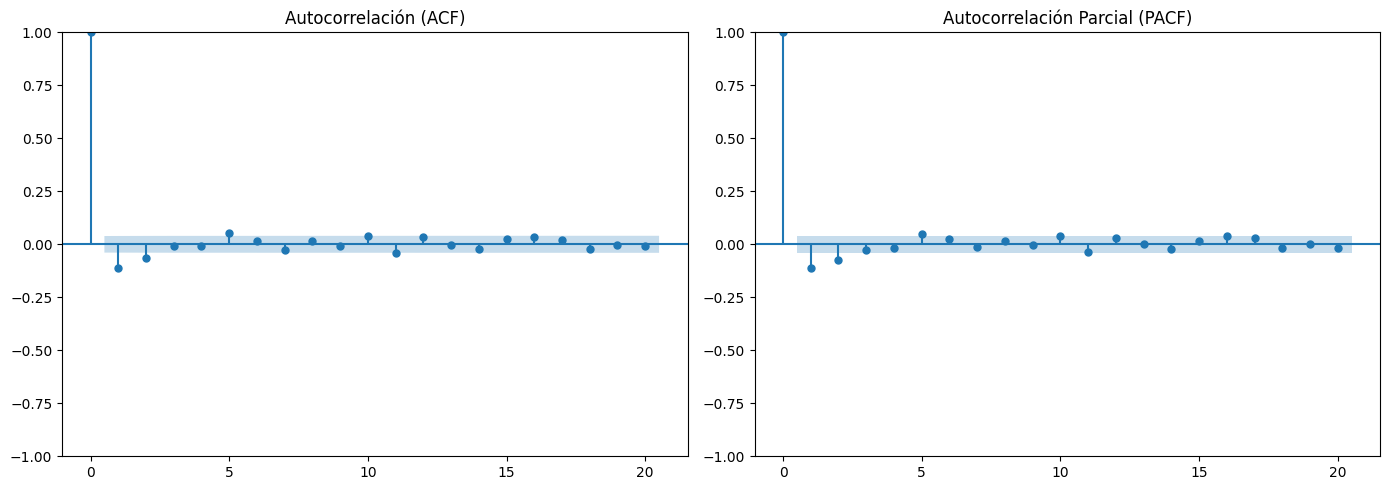

Mejores parámetros (p, d, q): (0, 0, 2)
Valor mínimo de AIC: -13246.630943441884


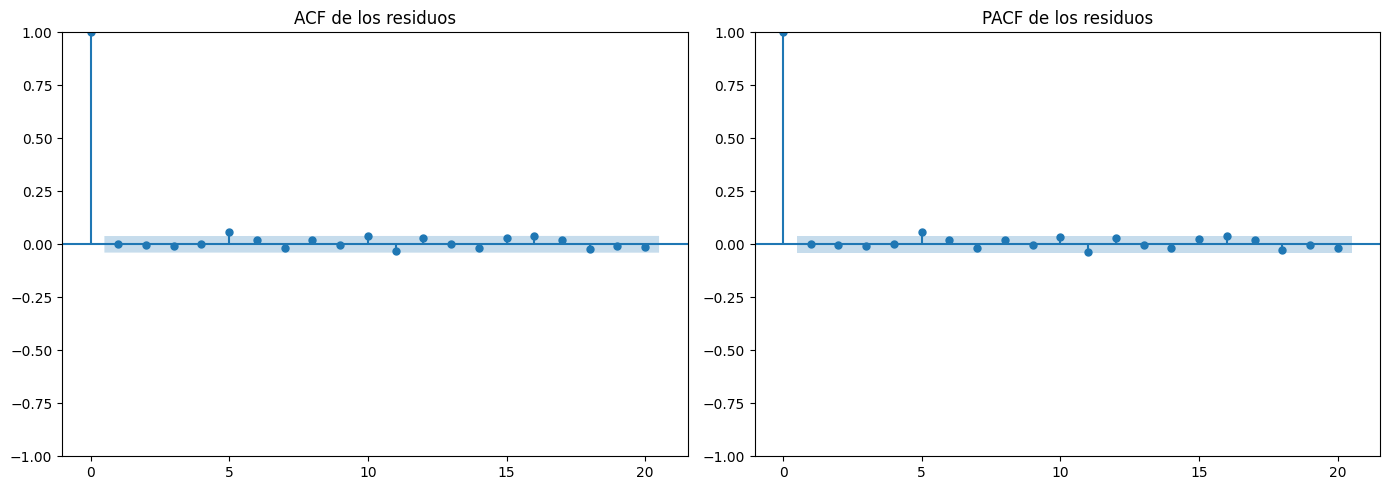

Resumen de los residuos del modelo:
count    2510.000000
mean        0.000003
std         0.017265
min        -0.083349
25%        -0.009574
50%        -0.000555
75%         0.009074
max         0.091373
dtype: float64


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

# Paso 1: Graficar la ACF y PACF
plt.figure(figsize=(14, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(retornos[symbol].dropna(), lags=20, ax=plt.gca())
plt.title("Autocorrelación (ACF)")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(retornos[symbol].dropna(), lags=20, ax=plt.gca())
plt.title("Autocorrelación Parcial (PACF)")

plt.tight_layout()
plt.show()

# Paso 2: Probar diferentes combinaciones de p y q
warnings.filterwarnings("ignore")  # Para evitar advertencias sobre la convergencia del modelo

# Listas para almacenar los resultados de AIC
aic_values = []
parameters = []

# Valores candidatos para p y q basados en la observación de las gráficas de ACF y PACF
p_values = range(0, 3)
q_values = range(0, 3)
d = 0  # Diferenciación ya realizada, por lo que se asume d=0

for p in p_values:
    for q in q_values:
        try:
            model = sm.tsa.ARIMA(retornos[symbol].dropna(), order=(p, d, q))
            model_fit = model.fit()
            aic_values.append(model_fit.aic)
            parameters.append((p, d, q))
        except:
            continue

# Seleccionar el modelo con el AIC más bajo
best_index = aic_values.index(min(aic_values))
best_params = parameters[best_index]
print(f"Mejores parámetros (p, d, q): {best_params}")
print(f"Valor mínimo de AIC: {aic_values[best_index]}")

# Paso 3: Validación del modelo con los mejores parámetros
best_model = sm.tsa.ARIMA(retornos[symbol].dropna(), order=best_params)
best_model_fit = best_model.fit()

# Graficar los residuos del modelo para validar
residuals = best_model_fit.resid

plt.figure(figsize=(14, 5))

# ACF de los residuos
plt.subplot(1, 2, 1)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title("ACF de los residuos")

# PACF de los residuos
plt.subplot(1, 2, 2)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title("PACF de los residuos")

plt.tight_layout()
plt.show()

# Verificar si los residuos son ruido blanco
print("Resumen de los residuos del modelo:")
print(residuals.describe())


Mejores parámetros (p, d, q): (0, 0, 2)
La combinación óptima de parámetros según el AIC fue (0, 0, 2). Esto significa que el modelo elegido no tiene un componente autoregresivo (
𝑝
=
0
p=0) ni diferenciación (
𝑑
=
0
d=0), pero incluye un componente de media móvil de orden 2 (
𝑞
=
2
q=2). Este resultado sugiere que los retornos de esta serie no requieren diferenciación adicional para volverse estacionarios, y que la autocorrelación significativa en los datos puede ser capturada adecuadamente mediante el componente de media móvil.

ACF y PACF de los residuos
Las gráficas de ACF y PACF de los residuos muestran que, después de ajustar el modelo, no hay autocorrelaciones significativas en los primeros rezagos de la ACF ni en la PACF. Esto indica que los residuos son prácticamente ruido blanco, lo cual es una buena señal. En otras palabras, el modelo ARIMA (0, 0, 2) parece haber capturado adecuadamente la estructura de dependencia en los datos, y no hay patrones remanentes en los residuos.

# Realiza pronostico
- Realizar un ARIMA ()
- Dado que la serie es estacionaria, el modelo deberia poder realizar pronosticos en el corto plazo

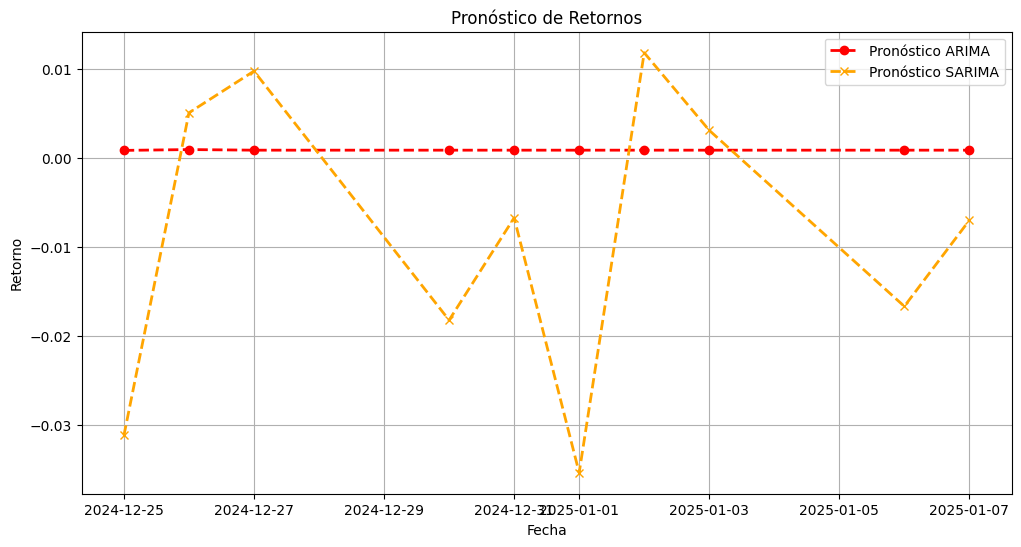

In [ ]:
import matplotlib.pyplot as plt

# Verificar y limpiar índices en las series de pronósticos
forecast_arima.index = pd.to_datetime(forecast_arima.index, errors='coerce')  # Convertir a datetime
forecast_arima = forecast_arima.dropna()  # Eliminar valores no válidos

forecast_sarima.index = pd.to_datetime(forecast_sarima.index, errors='coerce')  # Convertir a datetime
forecast_sarima = forecast_sarima.dropna()  # Eliminar valores no válidos

# Graficar los pronósticos
plt.figure(figsize=(12, 6))

# Graficar pronóstico ARIMA
plt.plot(forecast_arima.index, forecast_arima, label="Pronóstico ARIMA", color="red", linewidth=2, linestyle='--', marker='o')

# Graficar pronóstico SARIMA
plt.plot(forecast_sarima.index, forecast_sarima, label="Pronóstico SARIMA", color="orange", linewidth=2, linestyle='--', marker='x')

# Configuración del gráfico
plt.legend()
plt.title("Pronóstico de Retornos")
plt.xlabel("Fecha")
plt.ylabel("Retorno")
plt.grid()
plt.show()


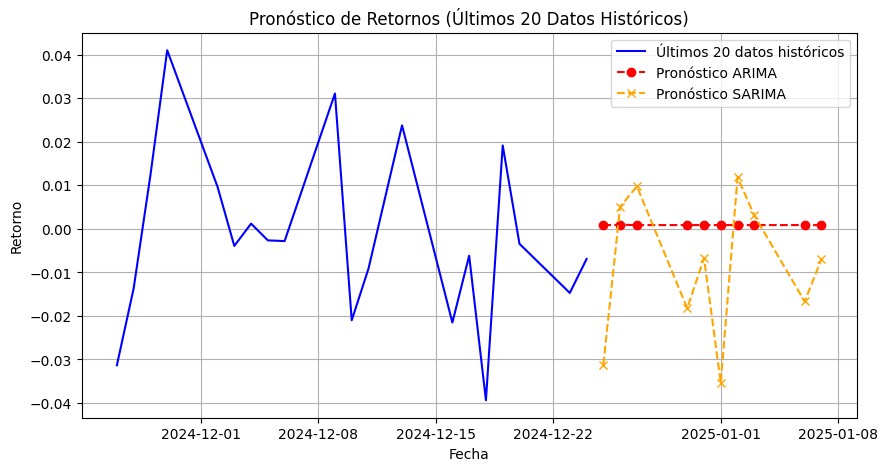

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filtra los últimos 2 años de datos históricos (asegurando que 'retornos' es un DataFrame con índice de fechas)
datos_historicos = retornos.last('2Y')  # Obtiene los últimos 2 años de datos

# Validar y limpiar los datos históricos
datos_historicos = datos_historicos.dropna()  # Eliminar valores nulos

# Ajustar el modelo ARIMA
model_arima = ARIMA(datos_historicos, order=(0, 0, 2))
model_arima_fit = model_arima.fit()

# Realizar pronósticos con ARIMA
steps_a_predecir = 10  # Número de pasos a pronosticar (10 días hábiles)
forecast_arima = model_arima_fit.predict(
    start=len(datos_historicos), end=len(datos_historicos) + steps_a_predecir - 1, typ='levels'
)

# Crear un índice de fechas para el pronóstico ARIMA
forecast_index = pd.date_range(start=datos_historicos.index[-1], periods=steps_a_predecir + 1, freq='B')[1:]
forecast_arima = pd.Series(forecast_arima.values, index=forecast_index)

# Ajustar el modelo SARIMA
model_sarima = SARIMAX(datos_historicos, order=(1, 1, 1), seasonal_order=(1, 1, 0, 5))
model_sarima_fit = model_sarima.fit()

# Realizar pronósticos con SARIMA
forecast_sarima = model_sarima_fit.predict(
    start=len(datos_historicos), end=len(datos_historicos) + steps_a_predecir - 1, typ='levels'
)
forecast_sarima = pd.Series(forecast_sarima.values, index=forecast_index)

# Seleccionar solo los últimos 20 datos históricos para la gráfica
datos_historicos_ultimos_20 = datos_historicos.tail(20)

# Visualizar los últimos 20 datos históricos junto con los pronósticos ARIMA y SARIMA
plt.figure(figsize=(10, 5))

# Graficar últimos 20 datos históricos
plt.plot(datos_historicos_ultimos_20.index, datos_historicos_ultimos_20, label="Últimos 20 datos históricos", color="blue")

# Graficar pronóstico ARIMA
plt.plot(forecast_arima.index, forecast_arima, label="Pronóstico ARIMA", color="red", linestyle="--", marker="o")

# Graficar pronóstico SARIMA
plt.plot(forecast_sarima.index, forecast_sarima, label="Pronóstico SARIMA", color="orange", linestyle="--", marker="x")

# Configuración del gráfico
plt.legend()
plt.title("Pronóstico de Retornos (Últimos 20 Datos Históricos)")
plt.xlabel("Fecha")
plt.ylabel("Retorno")
plt.grid()
plt.show()


In [ ]:
forecast_values = model_fit.forecast(steps=10)
print('rendimientos logaritmicos proximos 10 dias')
print(forecast_values)


rendimientos logaritmicos proximos 10 dias
498    0.000850
499    0.000943
500    0.000875
501    0.000875
502    0.000875
503    0.000875
504    0.000875
505    0.000875
506    0.000875
507    0.000875
Name: predicted_mean, dtype: float64


In [ ]:
# Suponiendo que el último precio conocido es el último valor de 'datos_historicos'
ultimo_precio = chedraui_data['Adj Close'].iloc[-1]  # Último precio conocido (en el índice más reciente)
ultimo_precio

,2024-12-24
Ticker,
CHDRAUIB.MX,125.309998


In [ ]:
import numpy as np

# Suponiendo que el último precio conocido es el último valor de 'datos_historicos'
ultimo_precio = chedraui_data['Adj Close'].iloc[-1]  # Último precio conocido (en el índice más reciente)

# Convertir los retornos logarítmicos pronosticados a precios
precios_pronosticados = ultimo_precio.values[0] * np.exp(forecast_values)

# Mostrar los precios pronosticados
print(precios_pronosticados)


498    125.416602
499    125.428246
500    125.419703
501    125.419703
502    125.419703
503    125.419703
504    125.419703
505    125.419703
506    125.419703
507    125.419703
Name: predicted_mean, dtype: float64


# Grid Search
- evalúa todas las combinaciones posibles de hiperparámetros dentro de un rango definido. Para ARIMA

In [ ]:
!pip install pmdarima


In [ ]:
import pmdarima as pm
from pmdarima.arima import auto_arima

# Definir el rango de valores para los hiperparámetros p, d, q
p = range(0, 4)  # Cambia según tu preferencia y el tamaño de tu dataset
d = range(0, 2)
q = range(0, 4)

# Ejecutar una búsqueda exhaustiva con auto_arima
model = auto_arima(
    chedraui_data['Adj Close'],  # Suponiendo que usas precios ajustados
    start_p=0, max_p=3,          # Rango de 'p'
    start_q=0, max_q=3,          # Rango de 'q'
    d=1,                         # Fijar 'd' en 1; ajusta si es necesario
    seasonal=False,              # Suponiendo modelo ARIMA sin estacionalidad
    trace=True,                  # Imprimir resultados de cada combinación
    error_action='ignore',       # Ignorar errores
    suppress_warnings=True,      # Suprimir advertencias
    stepwise=True                # Activar búsqueda escalonada para acelerar
)

print("Mejor combinación de parámetros (p, d, q):", model.order)


# Obtener el AIC del modelo con los mejores parametros
print("AIC del modelo:", model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7110.243, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7110.459, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7110.409, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7111.366, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7112.296, Time=3.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.460 seconds
Mejor combinación de parámetros (p, d, q): (0, 1, 0)
AIC del modelo: 7110.242983359203


# Random Search
-  explora una selección aleatoria de combinaciones de hiperparámetros dentro de un rango dado, lo cual es útil para reducir el tiempo de cómputo

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterSampler

# Definir los rangos de hiperparámetros
param_grid = {
    'p': range(0, 4),
    'd': range(0, 2),
    'q': range(0, 4)
}

# Generar combinaciones aleatorias de hiperparámetros
n_iter = 10  # Número de iteraciones de Random Search
param_list = list(ParameterSampler(param_grid, n_iter=n_iter, random_state=1))

# Almacenar el mejor modelo y su AIC
best_model = None
best_aic = np.inf

# Evaluar cada combinación de parámetros en param_list
for params in param_list:
    try:
        model = ARIMA(chedraui_data['Adj Close'], order=(params['p'], params['d'], params['q']))
        model_fit = model.fit()
        aic = model_fit.aic
        print(f"Parámetros probados: {params}, AIC: {aic}")

        # Actualizar el mejor modelo si el AIC es menor
        if aic < best_aic:
            best_aic = aic
            best_model = model_fit
    except:
        continue  # Ignorar combinaciones de parámetros que no convergen

print("Mejores parámetros encontrados:", best_model.model.order)
print("AIC del mejor modelo:", best_aic)


Parámetros probados: {'q': 3, 'p': 2, 'd': 1}, AIC: 7108.787587039393
Parámetros probados: {'q': 3, 'p': 0, 'd': 0}, AIC: 16160.525689617274
Parámetros probados: {'q': 2, 'p': 1, 'd': 1}, AIC: 7105.807253769867
Parámetros probados: {'q': 2, 'p': 0, 'd': 1}, AIC: 7113.387491846926
Parámetros probados: {'q': 3, 'p': 1, 'd': 1}, AIC: 7107.075394208639
Parámetros probados: {'q': 1, 'p': 0, 'd': 1}, AIC: 7111.712009501507
Parámetros probados: {'q': 1, 'p': 1, 'd': 1}, AIC: 7113.6281179948855
Parámetros probados: {'q': 0, 'p': 3, 'd': 1}, AIC: 7111.7148045046815
Parámetros probados: {'q': 3, 'p': 0, 'd': 1}, AIC: 7111.639255669768
Parámetros probados: {'q': 2, 'p': 3, 'd': 0}, AIC: 7124.435659106666
Mejores parámetros encontrados: (1, 1, 2)
AIC del mejor modelo: 7105.807253769867


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA con los mejores parámetros
model_arima = ARIMA((chedraui_data['Adj Close'], order=(1, 1, 2))  # Parámetros óptimos
model_arima_fit = model_arima.fit()

# Mostrar resumen del modelo
print(model_arima_fit.summary())

# Realizar pronósticos
steps_a_predecir = 10  # Número de pasos a pronosticar (por ejemplo, 10 días hábiles)
forecast_arima = model_arima_fit.forecast(steps=steps_a_predecir)

# Crear índice para el pronóstico
forecast_index = pd.date_range(start=adj_close.index[-1], periods=steps_a_predecir + 1, freq='B')[1:]
forecast_arima = pd.Series(forecast_arima.values, index=forecast_index)

# Graficar la serie original y el pronóstico
plt.figure(figsize=(10, 5))
plt.plot(adj_close, label="Adj Close (Histórico)", color="blue")
plt.plot(forecast_arima.index, forecast_arima, label="Pronóstico ARIMA", color="red", linestyle="--", marker="o")
plt.legend()
plt.title("Pronóstico de Precios Ajustados (Adj Close)")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado")
plt.grid()
plt.show()


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-65-24944806a4ff>, line 6)

In [ ]:
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Serie temporal a evaluar: precios ajustados de las acciones de Chedraui
serie = chedraui_data['Adj Close']

# Función para buscar los mejores parámetros usando Grid Search y Random Search
def buscar_mejores_parametros(series):
    # 1. Grid Search
    modelo_grid = auto_arima(
        series,
        start_p=1, max_p=5,
        start_q=1, max_q=5,
        seasonal=False,
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True  # Grid Search con búsqueda exhaustiva en el rango dado
    )
    # Parámetros y AIC de Grid Search
    grid_params = modelo_grid.get_params()['order']
    grid_aic = modelo_grid.aic()

    # 2. Random Search
    modelo_random = auto_arima(
        series,
        start_p=1, max_p=5,
        start_q=1, max_q=5,
        seasonal=False,
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        n_fits=10  # Realizar Random Search con 10 combinaciones aleatorias
    )
    # Parámetros y AIC de Random Search
    random_params = modelo_random.get_params()['order']
    random_aic = modelo_random.aic()

    # 3. Comparación de AIC para elegir el mejor conjunto de parámetros
    if grid_aic < random_aic:
        print(f"Mejores parámetros encontrados con Grid Search: {grid_params} con AIC={grid_aic}")
        return grid_params
    else:
        print(f"Mejores parámetros encontrados con Random Search: {random_params} con AIC={random_aic}")
        return random_params

# Guardar los mejores parámetros en variables
mejores_parametros = buscar_mejores_parametros(serie)
p, d, q = mejores_parametros  # Asignar los mejores valores


# Dividir la serie en entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
train_size = int(len(serie) * 0.8)
train, test = serie[:train_size], serie[train_size:]


# Construir y ajustar el modelo ARIMA con los mejores parámetros
modelo_arima = ARIMA(train, order=(p, d, q))
modelo_ajustado = modelo_arima.fit()

# Pronóstico
forecast = modelo_ajustado.forecast(steps=10)
print("Pronóstico de 10 días:", forecast)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.81 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=8912.685, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=8172.021, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8910.685, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=7805.299, Time=0.46 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=7678.715, Time=0.72 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=7541.548, Time=0.78 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=7484.886, Time=1.09 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.44 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.68 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=7482.889, Time=0.47 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=7539.551, Time=0.68 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=4.96 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.92 

In [ ]:
import numpy as np

# Calcular los retornos logarítmicos
retornos_log = np.log(chedraui_data['Adj Close']).diff().dropna()



# Aplicar la función de búsqueda de mejores parámetros y el modelo ARIMA
mejores_parametros = buscar_mejores_parametros(retornos_log)
p, d, q = mejores_parametros


# Dividir la serie en entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
train_size = int(len(retornos_log) * 0.8)
train, test = retornos_log[:train_size], retornos_log[train_size:]




modelo_arima = ARIMA(train, order=(p, d, q))
modelo_ajustado = modelo_arima.fit()

# Pronóstico de retornos logarítmicos
forecast_retornos = modelo_ajustado.forecast(steps=10)

# Convertir los retornos logarítmicos pronosticados a precios
ultimo_precio = chedraui_data['Adj Close'].iloc[-1]
forecast_precios = ultimo_precio.values[0] * np.exp(forecast_retornos.cumsum())
print("Pronóstico de precios ajustados a partir de retornos:", forecast_precios)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12979.517, Time=5.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11193.465, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11989.578, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11195.464, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13133.245, Time=3.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-13129.307, Time=2.61 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13108.428, Time=2.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13142.236, Time=2.59 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-13144.837, Time=6.91 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-13189.140, Time=7.27 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-13171.343, Time=7.68 sec
 ARIMA(1,1,5)(0,0,0)[0] in

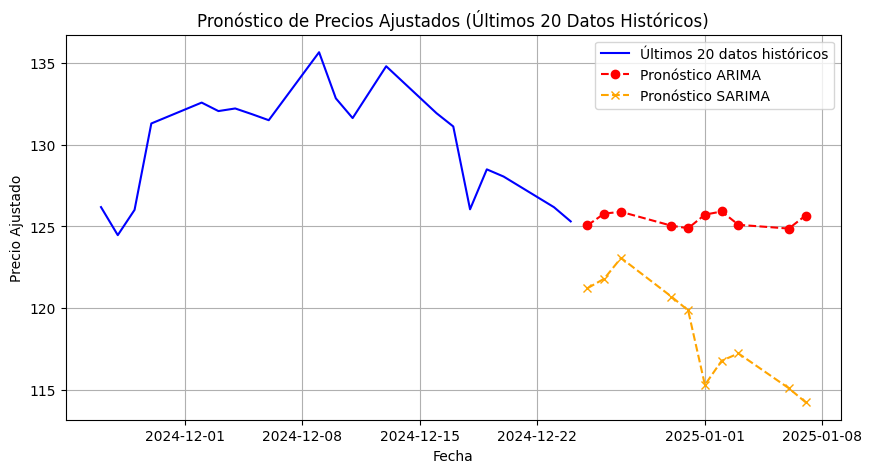

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filtra los últimos 2 años de datos históricos de `Adj Close`
adj_close = chedraui_data['Adj Close'].last('2Y')  # Suponiendo que `chedraui_data` contiene los precios ajustados

# Validar y limpiar los datos históricos
adj_close = adj_close.dropna()  # Eliminar valores nulos

# Diferenciar la serie para hacerla estacionaria
adj_close_diff = adj_close.diff().dropna()  # Primera diferencia

# Ajustar el modelo ARIMA
model_arima = ARIMA(adj_close, order=(2, 1, 5))  # (p=1, d=1, q=2)
model_arima_fit = model_arima.fit()

# Realizar pronósticos con ARIMA
steps_a_predecir = 10  # Número de pasos a pronosticar (10 días hábiles)
forecast_arima = model_arima_fit.forecast(steps=steps_a_predecir)

# Crear un índice de fechas para el pronóstico ARIMA
forecast_index = pd.date_range(start=adj_close.index[-1], periods=steps_a_predecir + 1, freq='B')[1:]
forecast_arima = pd.Series(forecast_arima.values, index=forecast_index)

# Ajustar el modelo SARIMA
model_sarima = SARIMAX(adj_close, order=(1, 1, 2), seasonal_order=(1, 1, 0, 5))
model_sarima_fit = model_sarima.fit()

# Realizar pronósticos con SARIMA
forecast_sarima = model_sarima_fit.predict(
    start=len(adj_close), end=len(adj_close) + steps_a_predecir - 1, typ='levels'
)
forecast_sarima = pd.Series(forecast_sarima.values, index=forecast_index)

# Seleccionar solo los últimos 20 datos históricos para la gráfica
adj_close_ultimos_20 = adj_close.tail(20)

# Visualizar los últimos 20 datos históricos junto con los pronósticos ARIMA y SARIMA
plt.figure(figsize=(10, 5))

# Graficar últimos 20 datos históricos
plt.plot(adj_close_ultimos_20.index, adj_close_ultimos_20, label="Últimos 20 datos históricos", color="blue")

# Graficar pronóstico ARIMA
plt.plot(forecast_arima.index, forecast_arima, label="Pronóstico ARIMA", color="red", linestyle="--", marker="o")

# Graficar pronóstico SARIMA
plt.plot(forecast_sarima.index, forecast_sarima, label="Pronóstico SARIMA", color="orange", linestyle="--", marker="x")

# Configuración del gráfico
plt.legend()
plt.title("Pronóstico de Precios Ajustados (Últimos 20 Datos Históricos)")
plt.xlabel("Fecha")
plt.ylabel("Precio Ajustado")
plt.grid()
plt.show()


In [ ]:
# Extraer el precio ajustado pronosticado para mañana (primer paso del pronóstico)
precio_arima_manana = forecast_arima.iloc[0]  # Primer valor del pronóstico ARIMA
precio_sarima_manana = forecast_sarima.iloc[0]  # Primer valor del pronóstico SARIMA

# Mostrar los resultados
print(f"Precio ajustado pronosticado para mañana por ARIMA: {precio_arima_manana|}")
print(f"Precio ajustado pronosticado para mañana por SARIMA: {precio_sarima_manana}")


Precio ajustado pronosticado para mañana por ARIMA: 125.0691635030145
Precio ajustado pronosticado para mañana por SARIMA: 121.22724442601779


In [ ]:
# Realizar predicciones para el conjunto de prueba
predicciones = modelo_ajustado.forecast(steps=len(test))


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular el MSE y MAE
mse = mean_squared_error(test, predicciones)
mae = mean_absolute_error(test, predicciones)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - predicciones) / predicciones)) * 100


print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')



MSE: 0.0002451818928103288
MAE: 0.01176688041057311
RMSE: 0.01565828511716174
MAPE: nan%


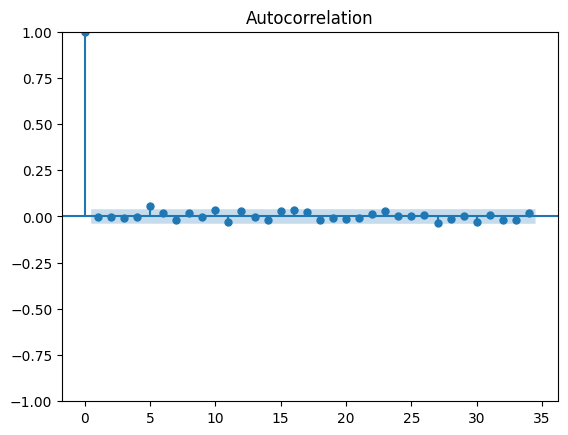

     lb_stat  lb_pvalue
10  14.22182   0.163112


In [ ]:
# ACF de los residuos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()

# Prueba de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box)


- lo que sugiere que no hay evidencia de autocorrelación en los residuos, lo cual es un buen signo de que el modelo ARIMA está bien ajustado.